In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
# load iris data
iris = datasets.load_iris()
print("Feature names: ", iris.feature_names)
print("Target name: ", iris.target_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target name:  ['setosa' 'versicolor' 'virginica']


In [7]:
# define variables
X = iris.data
y = iris.target
target_names = iris.target_names
IsSetosa = (iris.target==0)
print("Portion of Setosa: ", IsSetosa.sum()/len(IsSetosa))

Portion of Setosa:  0.3333333333333333


In [9]:
# data preprocessing
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['target'] = IsSetosa
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


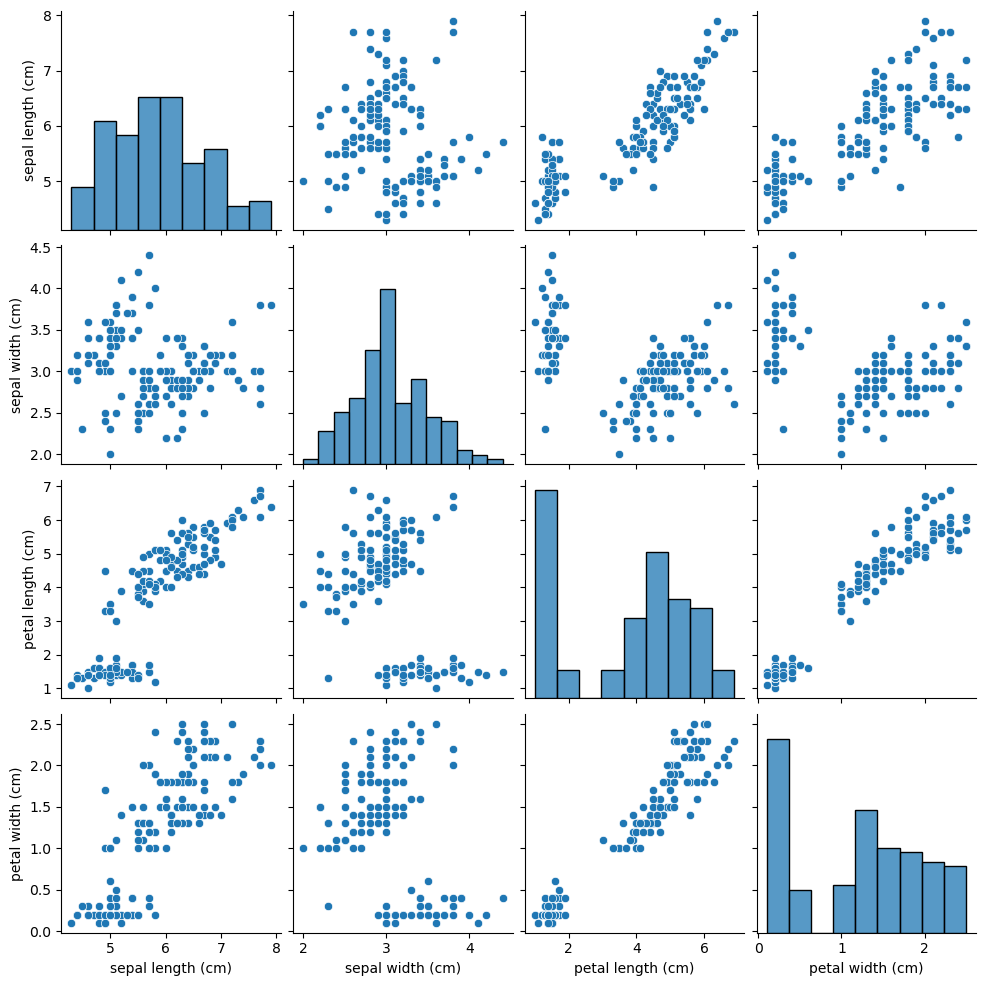

In [11]:
# plot pairwise scatterplot
sns.pairplot(df.iloc[:,:-1])
plt.show()

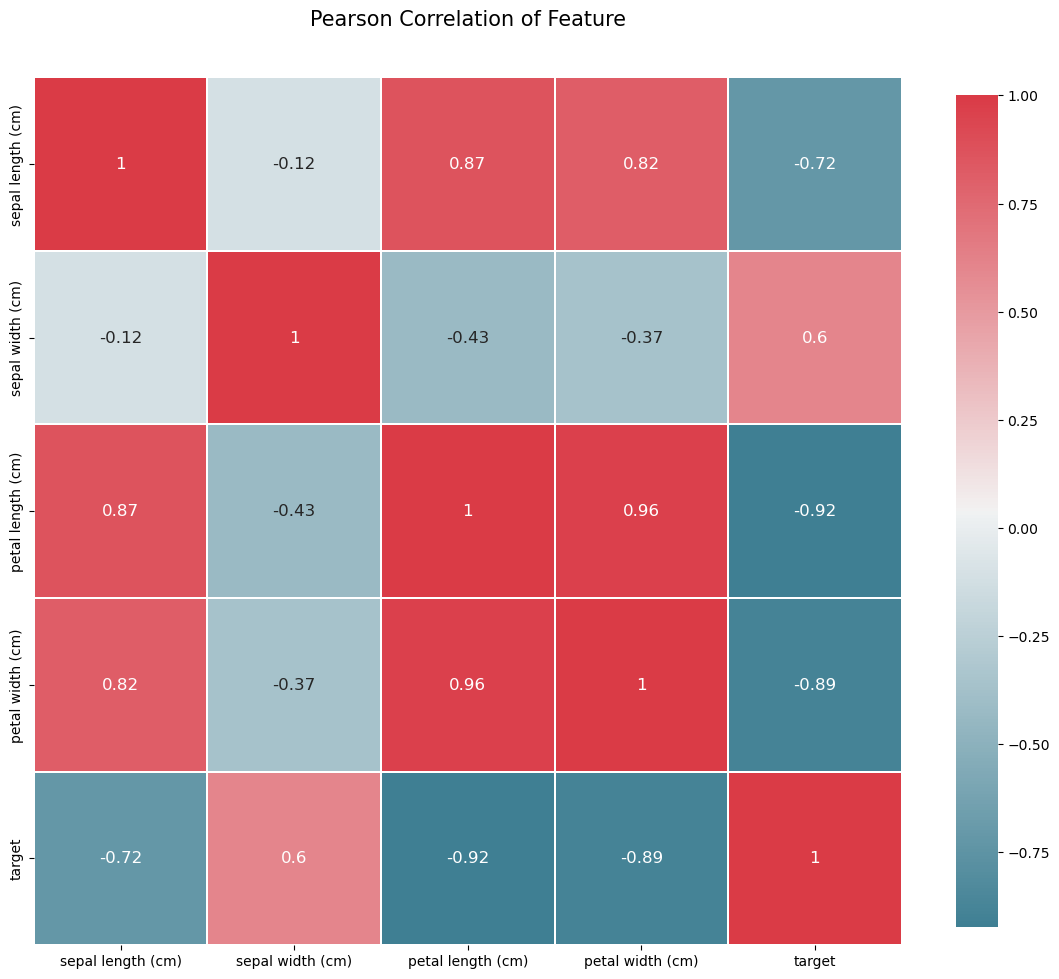

In [13]:
# plot heatmap
def correlation_heatmap(data):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(
        data.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink':.9},
        ax = ax, 
        annot = True,
        linewidths = 0.1, vmax = 1.0, linecolor = 'white',
        annot_kws = {'fontsize': 12}
    )
    plt.title('Pearson Correlation of Feature', y = 1.05, size = 15)
    plt.show()
# input df to the function, check correlation of all variables
correlation_heatmap(df)

In [15]:
# split data into training set and test set
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of training dataset: ', train.shape)
print('Size of test dataset: ', test.shape)

Size of training dataset:  (135, 5)
Size of test dataset:  (15, 5)


In [17]:
# let x in training set be all variables without target
# let y in training set be the target
x_train = train.iloc[:, :-1]
y_train = train['target']

# let x in the test set be all variables without target
# let y in the test set be the target
x_test = test.iloc[:, :-1]
y_test = test['target']

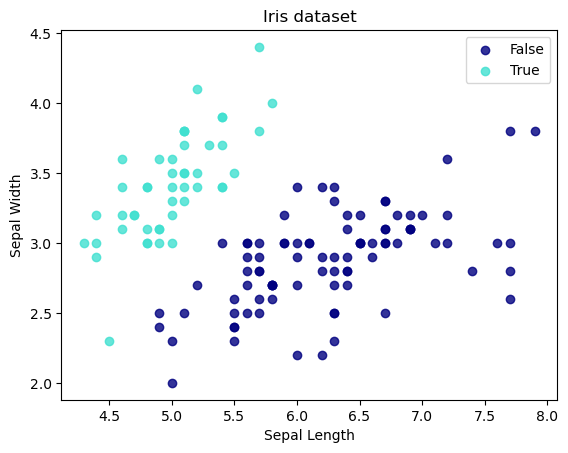

In [19]:
# plot
plt.figure()
colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0, 1], np.unique(y_train)):
    plt.scatter(x_train.iloc[:, 0][y_train == i], 
                x_train.iloc[:, 1][y_train == i],
               alpha=.8, 
               color=color,
               label=target_name)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Iris dataset')
plt.show()

In [23]:
# initialize a LDA instance and fit it with the training dataset
# number of components for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components = 1, store_covariance = True)
# fit LinearDiscriminantAnalysis model using first 2 features 
# and project data to maximize class separation
X_r = lda.fit(x_train.iloc[:, 0:2], y_train).transform(x_train.iloc[:, 0:2])

In [27]:
print("Intercept: \n", lda.intercept_)
print("Weight vector: \n", lda.coef_)
print("Mean: \n", lda.means_)
print("Covariance matrix: \n", lda.covariance_)

Intercept: 
 [4.92059597]
Weight vector: 
 [[-7.52241788 11.6932628 ]]
Mean: 
 [[6.25       2.875     ]
 [4.99574468 3.4106383 ]]
Covariance matrix: 
 [[0.35036407 0.11971946]
 [0.11971946 0.12214578]]


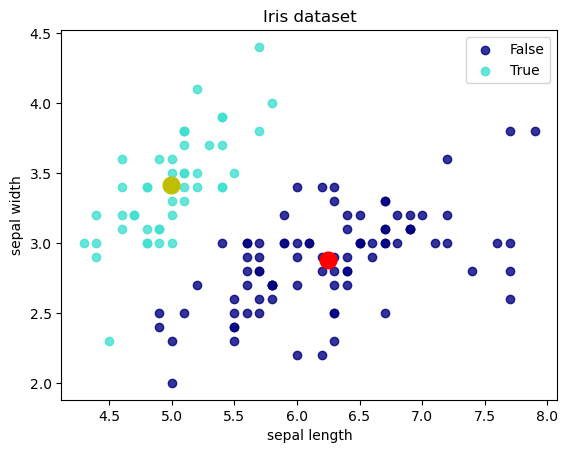

In [39]:
plt.figure() 
colors = ['navy', 'turquoise'] 
for color, i, target_name in zip(colors, [0, 1], np.unique(y_train)): 
    plt.scatter(x_train.iloc[:, 0][y_train == i], x_train.iloc[:, 1][y_train == i], alpha=.8, color = color, label = target_name)

plt.plot(lda.means_[0, 0], lda.means_[0, 1], 'ro', markersize=12) #plot mean by red circle
plt.plot(lda.means_[1, 0], lda.means_[1, 1], 'yo', markersize=12) #plot mean by yello circle
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Iris dataset')
plt.show()

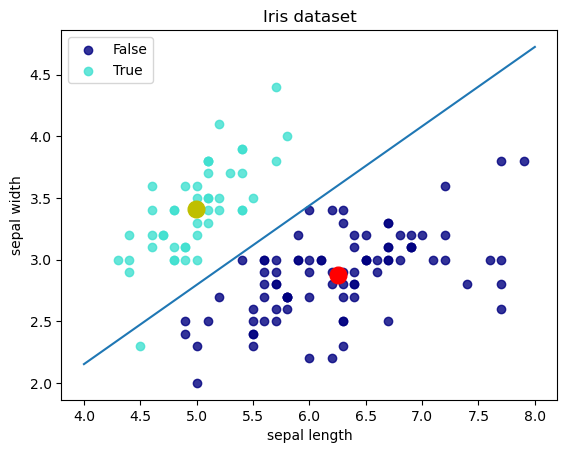

In [41]:
# plot decision boundary
plt.figure() 
x1 = np.linspace(4,8,10) 
x2 = (-lda.coef_[0][0]*x1 - lda.intercept_)/lda.coef_[0][1] 
plt.plot(x1, x2)

colors = ['navy', 'turquoise'] 
for color, i, target_name in zip(colors, [0, 1], np.unique(y_train)): 
    plt.scatter(x_train.iloc[:, 0][y_train == i], x_train.iloc[:, 1][y_train == i], alpha=.8, color = color, label = target_name)

plt.plot(lda.means_[0, 0], lda.means_[0, 1], 'ro', markersize=12) #plot mean by red circle
plt.plot(lda.means_[1, 0], lda.means_[1, 1], 'yo', markersize=12) #plot mean by yellow circle
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Iris dataset')
plt.show()

In [43]:
# training accuracy
print("Training Accuracy: ", accuracy_score(y_train, lda.predict(x_train.iloc[:, 0:2])))

Training Accuracy:  0.9925925925925926


In [45]:
# predict on test dataset using fitted LDA model
y_pred = lda.predict(x_test.iloc[:, 0:2])

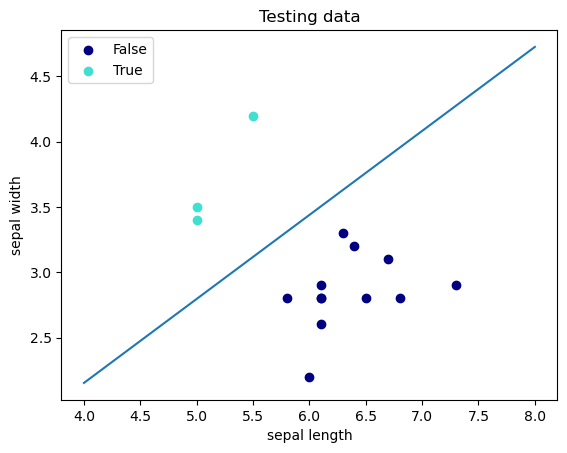

In [47]:
# plot
plt.figure()
x1 = np.linspace(4, 8, 10)
x2 = (-lda.coef_[0][0]*x1 - lda.intercept_)/lda.coef_[0][1]
plt.plot(x1, x2)
for color, i, target_name in zip(colors, [0, 1], np.unique(y_test)):
    plt.scatter(x_test.iloc[:, 0][y_test == i], 
               x_test.iloc[:, 1][y_test == i],
               color = color,
               label = target_name)
plt.title('Testing data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [49]:
# evaluate model using accuracy_score
from sklearn.metrics import accuracy_score
print("Prediction Accuracy: ", accuracy_score(y_test, y_pred))

Prediction Accuracy:  1.0
